# Assignment1_TheHai_Nguyen

### A. Choose a dataset

In [38]:
# Import relevant libraries
import pandas as pd
import seaborn as sns

In [39]:
# Titanic dataset
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### B. Clean the dataset

In [40]:
# Remove irrelavant columns: embark_town, embarked, deck, class, alive, fare
titanic.drop(['embark_town', 'embarked', 'deck', 'class', 'alive', 'fare'], axis=1, inplace=True)

# Remove missing values
titanic.dropna(axis=0, inplace=True)

# Convert categorical data into numerical values by replacing 'male' with 0, 'female' with 1, and similarly replace 'man', 'woman', and 'child' with 0, 1, 2 respectively
titanic["sex"] = titanic["sex"].map({"male": 0, "female": 1})
titanic["who"] = titanic["who"].map({"man": 0, "woman": 1, "child": 2})

# Display the cleaned dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,who,adult_male,alone
0,0,3,0,22.0,1,0,0,True,False
1,1,1,1,38.0,1,0,1,False,False
2,1,3,1,26.0,0,0,1,False,True
3,1,1,1,35.0,1,0,1,False,False
4,0,3,0,35.0,0,0,0,True,True


### C. Graph the data

In [41]:
# Set the color palette
palette = sns.color_palette("bright")

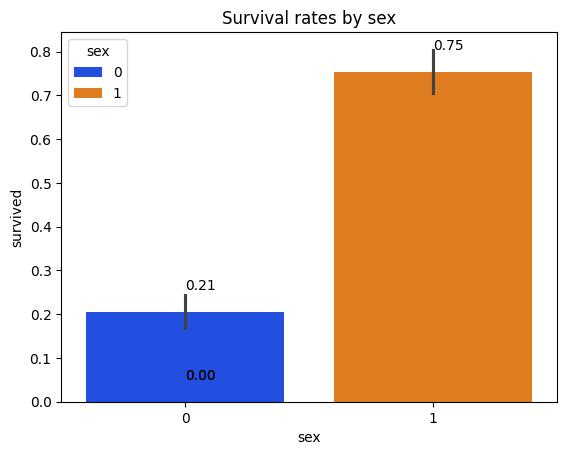

In [42]:
# Barplot 1: Compare survival rates by sex
bp1 = sns.barplot(x="sex", y="survived", hue="sex", data=titanic, palette=palette[:2])
bp1.set_title("Survival rates by sex")

for g in bp1.patches:
    bp1.annotate(format(g.get_height(), '.2f'), (g.get_x() + g.get_width() / 2., g.get_height() + .05))

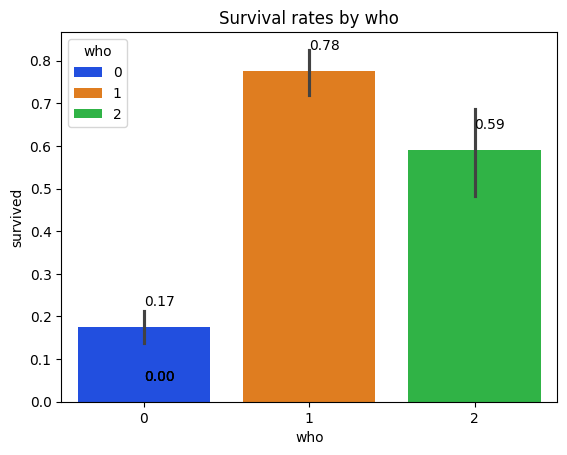

In [43]:
# Barplot 2: Compare survival rates by who
bp2 = sns.barplot(x="who", y="survived", hue="who", data=titanic, palette=palette[:3])
bp2.set_title("Survival rates by who")

for g in bp2.patches:
    bp2.annotate(format(g.get_height(), '.2f'), (g.get_x() + g.get_width() / 2., g.get_height() + .05))

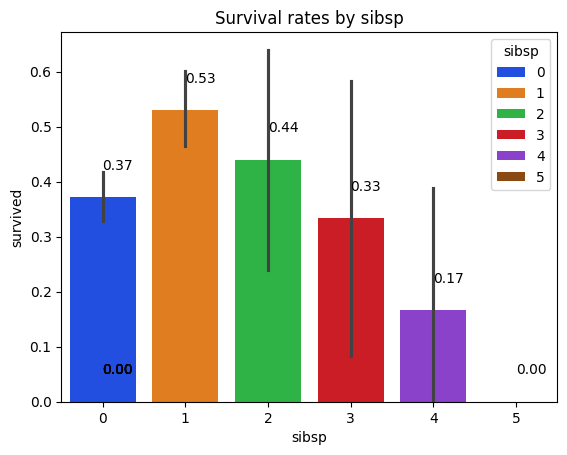

In [44]:
# Barplot 3: Compare survival rates by sbsp
bp3 = sns.barplot(x="sibsp", y="survived", hue="sibsp", data=titanic, palette=palette[:6])
bp3.set_title("Survival rates by sibsp")

for g in bp3.patches:
    bp3.annotate(format(g.get_height(), '.2f'), (g.get_x() + g.get_width() / 2., g.get_height() + .05))

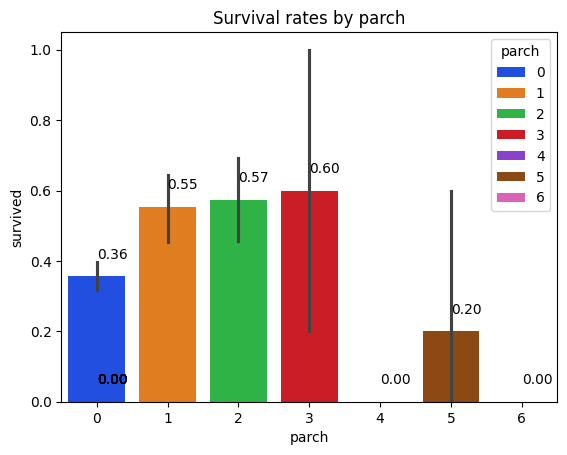

In [45]:
# Barplot 4: Compare survival rates by parch
bp4 = sns.barplot(x="parch", y="survived", hue="parch", data=titanic, palette=palette[:7])
bp4.set_title("Survival rates by parch")

for g in bp4.patches:
    bp4.annotate(format(g.get_height(), '.2f'), (g.get_x() + g.get_width() / 2., g.get_height() + .05))

C:\Users\theha\AppData\Local\Temp\ipykernel_7652\4087655534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_male["age_group"] = pd.cut(titanic_male["age"], bins=age_bins, labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60+"])


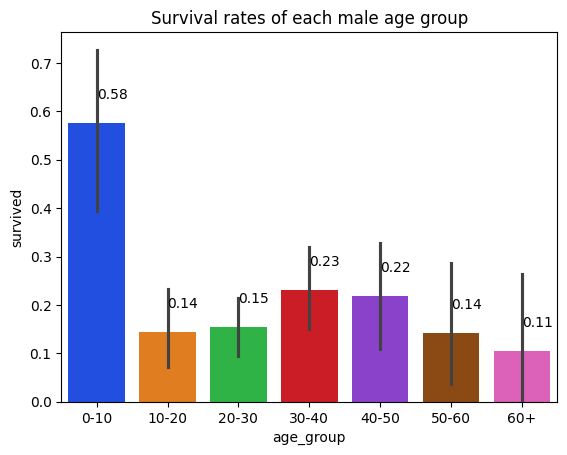

In [46]:
# Barplot 5: Examine the survival rates by ‘class’ and ‘who’

# Get the male dataset
titanic_male = titanic[titanic["sex"] == 0]

# Age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 100]

# Create a new column with age bins
titanic_male["age_group"] = pd.cut(titanic_male["age"], bins=age_bins, labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60+"])

# Barplot 5: Examine the survival rates by age group
bp5 = sns.barplot(x="age_group", y="survived", hue = "age_group", data=titanic_male, palette=palette[:7])

# Set title
bp5.set_title("Survival rates of each male age group")

for g in bp5.patches:
    bp5.annotate(format(g.get_height(), '.2f'), (g.get_x() + g.get_width() / 2., g.get_height() + .05))

### D. Train and test the algorithm

In [47]:
# Extract independent and dependent variables
x, y = titanic.drop("survived", axis=1), titanic["survived"]

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [48]:
# Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Test the model
predictions = model.predict(x_test)
model.score(x_test, y_test)

0.8050847457627118

### E. Answer the question

In [49]:
sample = {
    'pclass': [2],
    'sex': [0],
    'age': [19],
    'sibsp': [1],
    'parch': [0],
    'who': [0],
    'adult_male': [True],
    'alone': [False]
}

df = pd.DataFrame(sample)

print(model.predict(df))

[0]
